# Analyzing and Visualizing Data for the MARTA Service Area (Fulton, Dekalb, & Clayton Counties, GA) - Andrew Jarnagin
In this notebook, I will import and take a first look at Census data for the three primary counties in the service area of MARTA, Atlanta's primary public transit agency. At the tract level, I will start with basic racial demographics, then move on to car ownership or commute mode (whichever proves more useful), and a rough calculation of residential density (fingers crossed my idea works!).

In [1]:
#importing the necessary libraries
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

## Racial Demographics for the 3 Counties
I'll start with Fulton County data to get a handle on the process. Once I have everything worked out, I should be able to append Dekalb and Clayton tract data to a unified geodataframe and run my analysis for the entire service area. (Note: after I got everything working, to keep things more clean and organized, I went back and appended Dekalb and Clayton near the beginning of the notebook - that's why my first gdf is named fulton rather than atlanta. I hadn't figured how to download tract-level data for multiple geographic units in Census Explorer, but I got it for the B08141 table of Means of Transportation to Work section.)

In [2]:
fulton = gpd.read_file('data/Fulton County/acs2019_5yr_B03002_14000US13121002400.geojson')

In [3]:
fulton.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
0,05000US13121,"Fulton County, GA",1036200.0,0.0,961436.0,0.0,410771.0,992.0,451908.0,1548.0,...,77.0,10661.0,1715.0,4833.0,1124.0,2118.0,879.0,2715.0,729.0,"MULTIPOLYGON (((-84.73571 33.62461, -84.73520 ..."
1,14000US13121000100,"Census Tract 1, Fulton, GA",5410.0,359.0,5143.0,374.0,4656.0,377.0,120.0,112.0,...,19.0,45.0,54.0,0.0,19.0,0.0,19.0,0.0,19.0,"MULTIPOLYGON (((-84.36737 33.80544, -84.36710 ..."
2,14000US13121000200,"Census Tract 2, Fulton, GA",6175.0,448.0,5819.0,468.0,5256.0,435.0,149.0,60.0,...,19.0,29.0,36.0,49.0,59.0,49.0,59.0,0.0,19.0,"MULTIPOLYGON (((-84.37336 33.80143, -84.37230 ..."
3,14000US13121000400,"Census Tract 4, Fulton, GA",2047.0,292.0,1977.0,282.0,1705.0,209.0,164.0,91.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-84.38779 33.78851, -84.38779 ..."
4,14000US13121000500,"Census Tract 5, Fulton, GA",5219.0,651.0,4930.0,652.0,3326.0,654.0,1016.0,365.0,...,19.0,111.0,123.0,12.0,24.0,0.0,19.0,12.0,24.0,"MULTIPOLYGON (((-84.40086 33.79271, -84.40059 ..."


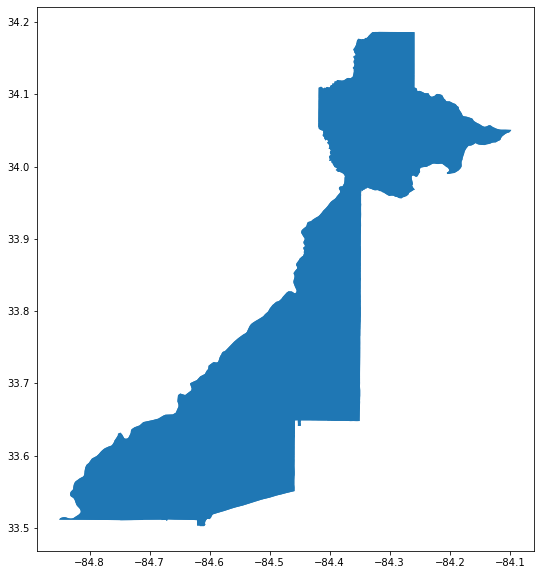

In [4]:
fulton.plot(figsize=(10,10))

In [5]:
fulton.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
63,14000US13121007200,"Census Tract 72, Fulton, GA",2136.0,280.0,2128.0,279.0,85.0,98.0,2021.0,286.0,...,13.0,0.0,13.0,7.0,10.0,7.0,10.0,0.0,13.0,"MULTIPOLYGON (((-84.39941 33.64995, -84.39940 ..."


In [6]:
fulton.geoid.head()

0          05000US13121
1    14000US13121000100
2    14000US13121000200
3    14000US13121000400
4    14000US13121000500
Name: geoid, dtype: object

I need to do some basic data cleaning - becuase I'm starting with the B03002 table, the process will be very similar to what we did in class last week.

In [7]:
fulton = fulton.drop([0])
fulton.head()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
1,14000US13121000100,"Census Tract 1, Fulton, GA",5410.0,359.0,5143.0,374.0,4656.0,377.0,120.0,112.0,...,19.0,45.0,54.0,0.0,19.0,0.0,19.0,0.0,19.0,"MULTIPOLYGON (((-84.36737 33.80544, -84.36710 ..."
2,14000US13121000200,"Census Tract 2, Fulton, GA",6175.0,448.0,5819.0,468.0,5256.0,435.0,149.0,60.0,...,19.0,29.0,36.0,49.0,59.0,49.0,59.0,0.0,19.0,"MULTIPOLYGON (((-84.37336 33.80143, -84.37230 ..."
3,14000US13121000400,"Census Tract 4, Fulton, GA",2047.0,292.0,1977.0,282.0,1705.0,209.0,164.0,91.0,...,13.0,0.0,13.0,0.0,13.0,0.0,13.0,0.0,13.0,"MULTIPOLYGON (((-84.38779 33.78851, -84.38779 ..."
4,14000US13121000500,"Census Tract 5, Fulton, GA",5219.0,651.0,4930.0,652.0,3326.0,654.0,1016.0,365.0,...,19.0,111.0,123.0,12.0,24.0,0.0,19.0,12.0,24.0,"MULTIPOLYGON (((-84.40086 33.79271, -84.40059 ..."
5,14000US13121000600,"Census Tract 6, Fulton, GA",7952.0,988.0,7485.0,990.0,3620.0,648.0,1511.0,346.0,...,19.0,85.0,66.0,9.0,17.0,0.0,19.0,9.0,17.0,"MULTIPOLYGON (((-84.41529 33.78408, -84.41526 ..."


## Adding in Dekalb and Clayton
Now that I've got the process figured out for my first dataset, I need to merge the Dekalb and Clayton geojson files into a single geodataframe with the Fulton data.

In [8]:
clayton = gpd.read_file('data/Fulton County/acs2019_5yr_B03002_14000US13063040518.geojson')
dekalb = gpd.read_file('data/Fulton County/acs2019_5yr_B03002_14000US13089023426.geojson')

In [9]:
clayton = clayton.drop([0])
dekalb = dekalb.drop([0])

In [12]:
joined_1 = fulton.append(clayton)
atlanta = joined_1.append(dekalb)
atlanta.sample()

,geoid,name,B03002001,"B03002001, Error",B03002002,"B03002002, Error",B03002003,"B03002003, Error",B03002004,"B03002004, Error",...,"B03002017, Error",B03002018,"B03002018, Error",B03002019,"B03002019, Error",B03002020,"B03002020, Error",B03002021,"B03002021, Error",geometry
21,14000US13089021215,"Census Tract 212.15, DeKalb, GA",6550.0,678.0,6128.0,579.0,1912.0,315.0,521.0,291.0,...,19.0,0.0,19.0,0.0,19.0,0.0,19.0,0.0,19.0,"MULTIPOLYGON (((-84.34793 33.92700, -84.34788 ..."


In [13]:
list(atlanta)

['geoid',
 'name',
 'B03002001',
 'B03002001, Error',
 'B03002002',
 'B03002002, Error',
 'B03002003',
 'B03002003, Error',
 'B03002004',
 'B03002004, Error',
 'B03002005',
 'B03002005, Error',
 'B03002006',
 'B03002006, Error',
 'B03002007',
 'B03002007, Error',
 'B03002008',
 'B03002008, Error',
 'B03002009',
 'B03002009, Error',
 'B03002010',
 'B03002010, Error',
 'B03002011',
 'B03002011, Error',
 'B03002012',
 'B03002012, Error',
 'B03002013',
 'B03002013, Error',
 'B03002014',
 'B03002014, Error',
 'B03002015',
 'B03002015, Error',
 'B03002016',
 'B03002016, Error',
 'B03002017',
 'B03002017, Error',
 'B03002018',
 'B03002018, Error',
 'B03002019',
 'B03002019, Error',
 'B03002020',
 'B03002020, Error',
 'B03002021',
 'B03002021, Error',
 'geometry']

In [14]:
columnstokeep = ['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [15]:
atlanta = atlanta[columnstokeep]
atlanta.head()

,geoid,name,B03002001,B03002002,B03002003,B03002004,B03002005,B03002006,B03002007,B03002008,B03002009,B03002012,geometry
1,14000US13121000100,"Census Tract 1, Fulton, GA",5410.0,5143.0,4656.0,120.0,0.0,129.0,0.0,0.0,238.0,267.0,"MULTIPOLYGON (((-84.36737 33.80544, -84.36710 ..."
2,14000US13121000200,"Census Tract 2, Fulton, GA",6175.0,5819.0,5256.0,149.0,0.0,175.0,0.0,0.0,239.0,356.0,"MULTIPOLYGON (((-84.37336 33.80143, -84.37230 ..."
3,14000US13121000400,"Census Tract 4, Fulton, GA",2047.0,1977.0,1705.0,164.0,0.0,87.0,0.0,0.0,21.0,70.0,"MULTIPOLYGON (((-84.38779 33.78851, -84.38779 ..."
4,14000US13121000500,"Census Tract 5, Fulton, GA",5219.0,4930.0,3326.0,1016.0,0.0,381.0,23.0,0.0,184.0,289.0,"MULTIPOLYGON (((-84.40086 33.79271, -84.40059 ..."
5,14000US13121000600,"Census Tract 6, Fulton, GA",7952.0,7485.0,3620.0,1511.0,0.0,2113.0,18.0,51.0,172.0,467.0,"MULTIPOLYGON (((-84.41529 33.78408, -84.41526 ..."


In [16]:
list(atlanta)

['geoid',
 'name',
 'B03002001',
 'B03002002',
 'B03002003',
 'B03002004',
 'B03002005',
 'B03002006',
 'B03002007',
 'B03002008',
 'B03002009',
 'B03002012',
 'geometry']

In [25]:
atlanta.columns = ['geoid',
 'name',
 'Total',
 'Not Latinx',
 'White',
 'Black',
 'American Indian/Alaska Native',
 'Asian',
 'Native Hawaiian/Other Pacific Islander',
 'Other',
 'Two or more races',
 'Latinx',
 'geometry']

In [26]:
atlanta.head()

,geoid,name,Total,Not Latinx,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other,Two or more races,Latinx,geometry
1,14000US13121000100,"Census Tract 1, Fulton, GA",5410.0,5143.0,4656.0,120.0,0.0,129.0,0.0,0.0,238.0,267.0,"MULTIPOLYGON (((-84.36737 33.80544, -84.36710 ..."
2,14000US13121000200,"Census Tract 2, Fulton, GA",6175.0,5819.0,5256.0,149.0,0.0,175.0,0.0,0.0,239.0,356.0,"MULTIPOLYGON (((-84.37336 33.80143, -84.37230 ..."
3,14000US13121000400,"Census Tract 4, Fulton, GA",2047.0,1977.0,1705.0,164.0,0.0,87.0,0.0,0.0,21.0,70.0,"MULTIPOLYGON (((-84.38779 33.78851, -84.38779 ..."
4,14000US13121000500,"Census Tract 5, Fulton, GA",5219.0,4930.0,3326.0,1016.0,0.0,381.0,23.0,0.0,184.0,289.0,"MULTIPOLYGON (((-84.40086 33.79271, -84.40059 ..."
5,14000US13121000600,"Census Tract 6, Fulton, GA",7952.0,7485.0,3620.0,1511.0,0.0,2113.0,18.0,51.0,172.0,467.0,"MULTIPOLYGON (((-84.41529 33.78408, -84.41526 ..."


In [27]:
randomtract = atlanta.sample()
randomtract

,geoid,name,Total,Not Latinx,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other,Two or more races,Latinx,geometry
131,14000US13121010206,"Census Tract 102.06, Fulton, GA",5618.0,5403.0,4676.0,314.0,7.0,321.0,0.0,0.0,85.0,215.0,"MULTIPOLYGON (((-84.44417 33.88745, -84.44412 ..."


In [28]:
randomtract.iloc[0]['Total']

5618.0

In [29]:
print((randomtract.iloc[0]['White'] + 
      randomtract.iloc[0]['Black'] + 
      randomtract.iloc[0]['American Indian/Alaska Native'] + 
      randomtract.iloc[0]['Asian'] + 
      randomtract.iloc[0]['Native Hawaiian/Other Pacific Islander'] + 
      randomtract.iloc[0]['Other'] + 
      randomtract.iloc[0]['Two or more races'] + 
      randomtract.iloc[0]['Latinx']))

5618.0


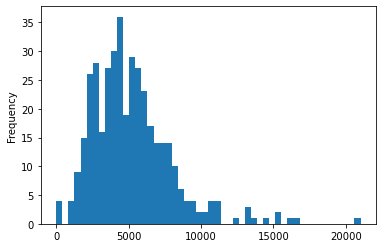

In [30]:
atlanta['Total'].plot.hist(bins=50)

In [31]:
atlanta_largest = atlanta.sort_values(by='Total',ascending=False)
atlanta_largest[['geoid','Total']].head(10)

,geoid,Total
137,14000US13121010301,21010.0
123,14000US13089023418,16529.0
139,14000US13121010304,16329.0
187,14000US13121011614,15411.0
143,14000US13121010510,15147.0
146,14000US13121010513,14560.0
180,14000US13121011504,13727.0
37,14000US13063040608,13393.0
147,14000US13121010514,13374.0
13,14000US13063040411,13311.0


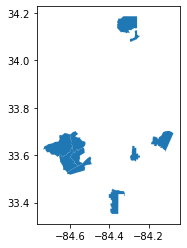

In [32]:
atlanta_largest.head(10).plot()

In [33]:
atlanta['Percent Not Latinx'] = atlanta['Not Latinx']/atlanta['Total']*100
atlanta['Percent Latinx'] = atlanta['Latinx']/atlanta['Total']*100
atlanta['Percent White'] = atlanta['White']/atlanta['Total']*100
atlanta['Percent Black'] = atlanta['Black']/atlanta['Total']*100
atlanta['Percent American Indian/Alaska Native'] = atlanta['American Indian/Alaska Native']/atlanta['Total']*100
atlanta['Percent Asian'] = atlanta['Asian']/atlanta['Total']*100
atlanta['Percent Native Hawaiian/Other Pacific Islander'] = atlanta['Native Hawaiian/Other Pacific Islander']/atlanta['Total']*100
atlanta['Percent Other'] = atlanta['Other']/atlanta['Total']*100
atlanta['Percent Two or more races'] = atlanta['Two or more races']/atlanta['Total']*100
atlanta.sample(5)

,geoid,name,Total,Not Latinx,White,Black,American Indian/Alaska Native,Asian,Native Hawaiian/Other Pacific Islander,Other,...,geometry,Percent Not Latinx,Percent Latinx,Percent White,Percent Black,Percent American Indian/Alaska Native,Percent Asian,Percent Native Hawaiian/Other Pacific Islander,Percent Other,Percent Two or more races
15,14000US13121001600,"Census Tract 16, Fulton, GA",2237.0,2153.0,1837.0,127.0,0.0,151.0,0.0,0.0,...,"MULTIPOLYGON (((-84.36392 33.77113, -84.36229 ...",96.244971,3.755029,82.118909,5.677246,0.0,6.750112,0.0,0.000000,1.698704
204,14000US13121980000,"Census Tract 9800, Fulton, GA",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"MULTIPOLYGON (((-84.44577 33.64881, -84.44565 ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,14000US13121009603,"Census Tract 96.03, Fulton, GA",4830.0,4515.0,3392.0,727.0,0.0,206.0,0.0,67.0,...,"MULTIPOLYGON (((-84.38738 33.82925, -84.38738 ...",93.478261,6.521739,70.227743,15.051760,0.0,4.265010,0.0,1.387164,2.546584
138,14000US13121010303,"Census Tract 103.03, Fulton, GA",10840.0,10825.0,4.0,10752.0,0.0,15.0,0.0,0.0,...,"MULTIPOLYGON (((-84.63265 33.69929, -84.63213 ...",99.861624,0.138376,0.036900,99.188192,0.0,0.138376,0.0,0.000000,0.498155
30,14000US13089021308,"Census Tract 213.08, DeKalb, GA",4391.0,2095.0,1074.0,500.0,0.0,459.0,0.0,0.0,...,"MULTIPOLYGON (((-84.30240 33.86653, -84.29951 ...",47.711228,52.288772,24.459121,11.386928,0.0,10.453200,0.0,0.000000,1.411979


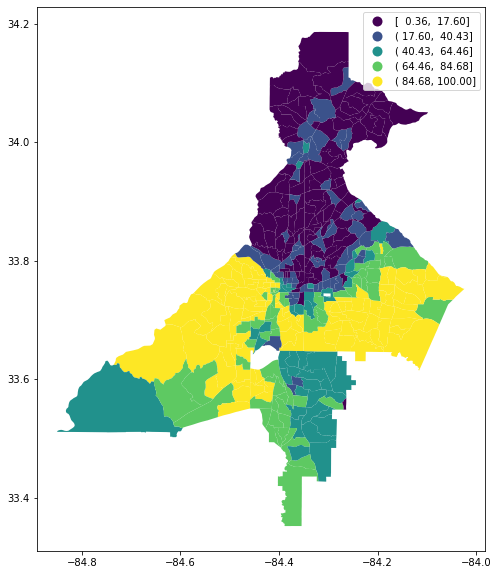

In [37]:
#this should give a map of the MARTA service area by percent Black residents
atlanta.plot(figsize=(12,10),
           column='Percent Black',
           legend=True,
           scheme='NaturalBreaks')

Text(0.5, 1.0, 'Percent Black')

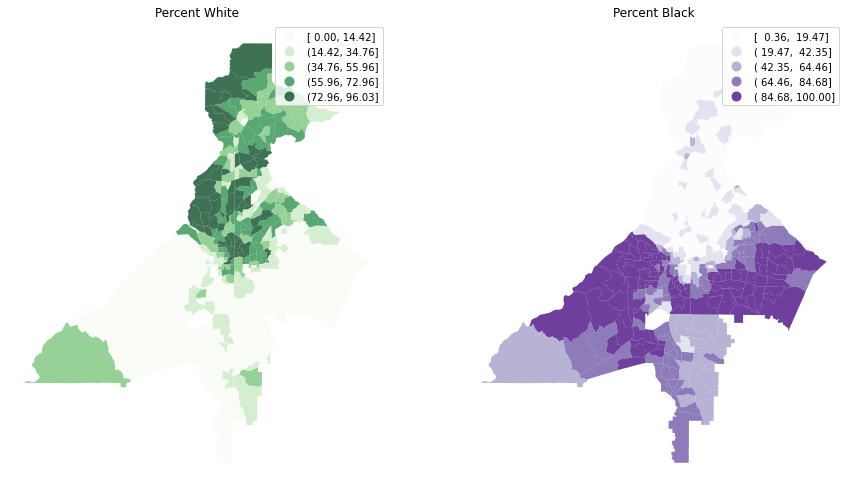

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

atlanta.plot(column='Percent White', 
            cmap='Greens', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent White")

atlanta.plot(column='Percent Black', 
            cmap='Purples', 
            scheme='NaturalBreaks',
            k=5, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Black")

# Adding Vehicle Access Data
Now that I have the basic racial demographics down, I want to add data about vehicle ownership. The best table I could find is B08141, Means of Transportation to Work by Vehicles Available. It doesn't perfectly measure car ownership, but I think it's close enough for this purpose. I figured out how to download tract-level data from Census Explorer for multiple counties at once, so I don't have to append the counties together! I'm not sure if I'll need to combine the relevant columns from this new dataset into a single gdf with the race data for analysis going forward, or whether they can stay separate.

In [41]:
transpo = gpd.read_file('data/Fulton County/acs2019_5yr_B08141_14000US13121007602.geojson')

In [44]:
#I'll need to drop the total rows for each county
transpo = transpo.sort_values(by='B08141001',ascending=False)
transpo[['name','B08141001']].head(10)
#turns out there's only a total for Clayton! good to know.

,name,B08141001
0,"Clayton County, GA",125268.0
332,"Census Tract 103.01, Fulton, GA",9812.0
382,"Census Tract 116.14, Fulton, GA",8204.0
334,"Census Tract 103.04, Fulton, GA",7982.0
173,"Census Tract 234.18, DeKalb, GA",7585.0
338,"Census Tract 105.10, Fulton, GA",7530.0
341,"Census Tract 105.13, Fulton, GA",6849.0
342,"Census Tract 105.14, Fulton, GA",6611.0
13,"Census Tract 404.11, Clayton, GA",6536.0
391,"Census Tract 116.23, Fulton, GA",6507.0


In [52]:
transpo = transpo.drop([0])

In [45]:
#I'll check out the metadata file to see what columns I want to keep: 
#for now, the number of vehicles available as well as how many people commute via public transit or walking
list(transpo)

['geoid',
 'name',
 'B08141001',
 'B08141001, Error',
 'B08141002',
 'B08141002, Error',
 'B08141003',
 'B08141003, Error',
 'B08141004',
 'B08141004, Error',
 'B08141005',
 'B08141005, Error',
 'B08141006',
 'B08141006, Error',
 'B08141007',
 'B08141007, Error',
 'B08141008',
 'B08141008, Error',
 'B08141009',
 'B08141009, Error',
 'B08141010',
 'B08141010, Error',
 'B08141011',
 'B08141011, Error',
 'B08141012',
 'B08141012, Error',
 'B08141013',
 'B08141013, Error',
 'B08141014',
 'B08141014, Error',
 'B08141015',
 'B08141015, Error',
 'B08141016',
 'B08141016, Error',
 'B08141017',
 'B08141017, Error',
 'B08141018',
 'B08141018, Error',
 'B08141019',
 'B08141019, Error',
 'B08141020',
 'B08141020, Error',
 'B08141021',
 'B08141021, Error',
 'B08141022',
 'B08141022, Error',
 'B08141023',
 'B08141023, Error',
 'B08141024',
 'B08141024, Error',
 'B08141025',
 'B08141025, Error',
 'B08141026',
 'B08141026, Error',
 'B08141027',
 'B08141027, Error',
 'B08141028',
 'B08141028, Error',
 

In [47]:
transpo_to_keep = ['geoid',
 'name',
 'B08141001',
 'B08141002',
 'B08141003',
 'B08141004',
 'B08141005',
 'B08141016',
 'B08141021',
 'geometry']

In [48]:
transpo = transpo[transpo_to_keep]

In [50]:
transpo.columns = ['geoid',
 'name',
 'Total',
 'No vehicle available',
 'One vehicle available',
 'Two vehicles available',
 'Three or more vehicles available',
 'Public transportation',
 'Walked',
 'geometry']

In [53]:
transpo.head()

,geoid,name,Total,No vehicle available,One vehicle available,Two vehicles available,Three or more vehicles available,Public transportation,Walked,geometry
332,14000US13121010301,"Census Tract 103.01, Fulton, GA",9812.0,0.0,1382.0,4757.0,3673.0,96.0,0.0,"MULTIPOLYGON (((-84.73520 33.62511, -84.73523 ..."
382,14000US13121011614,"Census Tract 116.14, Fulton, GA",8204.0,197.0,2809.0,3364.0,1834.0,71.0,65.0,"MULTIPOLYGON (((-84.29522 34.08752, -84.29520 ..."
334,14000US13121010304,"Census Tract 103.04, Fulton, GA",7982.0,0.0,1494.0,2971.0,3517.0,172.0,23.0,"MULTIPOLYGON (((-84.60028 33.68698, -84.60024 ..."
173,14000US13089023418,"Census Tract 234.18, DeKalb, GA",7585.0,0.0,2937.0,2422.0,2226.0,258.0,49.0,"MULTIPOLYGON (((-84.18785 33.65420, -84.18727 ..."
338,14000US13121010510,"Census Tract 105.10, Fulton, GA",7530.0,323.0,2470.0,2970.0,1767.0,288.0,0.0,"MULTIPOLYGON (((-84.61440 33.52685, -84.61155 ..."


To get some useful information, I'll add percentages, just like I did with the race data

In [54]:
transpo['Percent No vehicle available'] = transpo['No vehicle available']/transpo['Total']*100
transpo['Percent One vehicle available'] = transpo['One vehicle available']/transpo['Total']*100
transpo['Percent Two vehicles available'] = transpo['Two vehicles available']/transpo['Total']*100
transpo['Percent Three or more vehicles available'] = transpo['Three or more vehicles available']/transpo['Total']*100
transpo['Percent Public transportation'] = transpo['Public transportation']/transpo['Total']*100
transpo['Percent Walked'] = transpo['Walked']/transpo['Total']*100
transpo.sample(5)

,geoid,name,Total,No vehicle available,One vehicle available,Two vehicles available,Three or more vehicles available,Public transportation,Walked,geometry,Percent No vehicle available,Percent One vehicle available,Percent Two vehicles available,Percent Three or more vehicles available,Percent Public transportation,Percent Walked
118,14000US13089022001,"Census Tract 220.01, DeKalb, GA",2437.0,78.0,694.0,1143.0,522.0,200.0,14.0,"MULTIPOLYGON (((-84.26271 33.82277, -84.26241 ...",3.200657,28.477636,46.901929,21.419778,8.206812,0.574477
345,14000US13121010601,"Census Tract 106.01, Fulton, GA",1445.0,159.0,638.0,503.0,145.0,236.0,81.0,"MULTIPOLYGON (((-84.47101 33.66213, -84.46984 ...",11.003460,44.152249,34.809689,10.034602,16.332180,5.605536
71,14000US13089021215,"Census Tract 212.15, DeKalb, GA",3303.0,210.0,1684.0,1188.0,221.0,460.0,66.0,"MULTIPOLYGON (((-84.34793 33.92700, -84.34788 ...",6.357856,50.983954,35.967302,6.690887,13.926733,1.998183
367,14000US13121011421,"Census Tract 114.21, Fulton, GA",2289.0,109.0,1244.0,606.0,330.0,147.0,8.0,"MULTIPOLYGON (((-84.34344 34.03709, -84.34324 ...",4.761905,54.346876,26.474443,14.416776,6.422018,0.349498
227,14000US13121003800,"Census Tract 38, Fulton, GA",216.0,75.0,141.0,0.0,0.0,43.0,66.0,"MULTIPOLYGON (((-84.41756 33.75411, -84.41755 ...",34.722222,65.277778,0.000000,0.000000,19.907407,30.555556


In [63]:
#I want to get some basic stats for this dataset
transpo['Percent Public transportation'].describe()

count    394.000000
mean       8.647032
std        8.866690
min        0.000000
25%        2.407702
50%        6.003759
75%       11.633193
max       63.774403
Name: Percent Public transportation, dtype: float64

In [65]:
transpo['Percent No vehicle available'].describe()

count    394.000000
mean       6.656495
std        7.483861
min        0.000000
25%        1.260412
50%        4.246120
75%        9.575723
max       49.963847
Name: Percent No vehicle available, dtype: float64

## Interesting Finds
I'm not surprised by the statistics of carless and transit-using households in general. However, I do want to follow up later and figure out what's happening with some of the outliers. 63% public transit use in Atlanta is astronomical, and I'd like to know how well-served by public transit the tract with almost 50% of workers who lack vehicle access is. Things to follow up on!

Text(0.5, 1.0, 'Percent Public transportation')

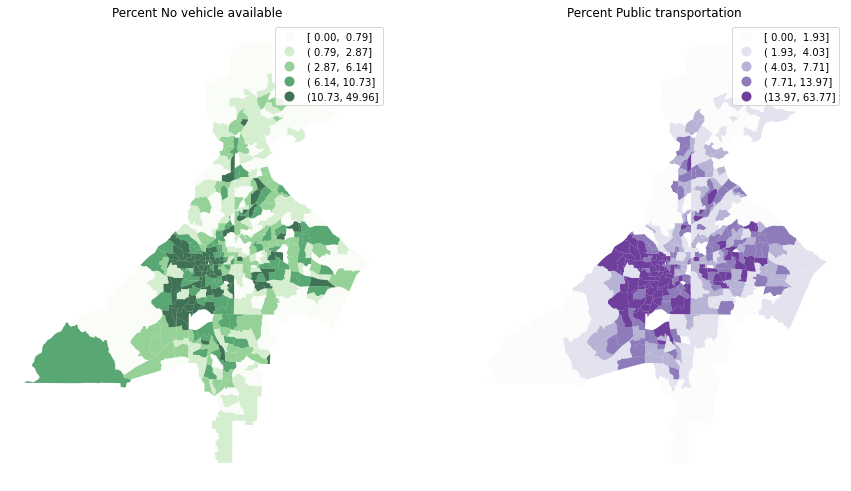

In [61]:
#mapping carless (for commuting purposes) households vs. transit use in MARTA service area
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

ax1, ax2 = axs

transpo.plot(column='Percent No vehicle available', 
            cmap='Greens', 
            scheme='quantiles',
            k=5, 
            edgecolor='black', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent No vehicle available")

transpo.plot(column='Percent Public transportation', 
            cmap='Purples', 
            scheme='quantiles',
            k=5, 
            edgecolor='black', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2,
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Public transportation")

# Findings
Atlanta is very racially segregated between Black and White residents, roughly in a north-south split (athough there are also substantial Latinx and Asian populations, which I did not map. Of greatest interest are the significant areas that are almost exclusively White or Black. If I had added income, I would expect to see a similar divide. 

Households with no vehicles available for commuting are heavily concentrated in the southern parts of Fulton County, as well south Dekalb and parts of Clayton County. Unsurprisingly, public transportation use roughly matches lack of vehicle access.

# Next Steps
I want to first overlay MARTA's heavy rail system map with the commute mode data, particularly to find areas far from rail and without cars. Using geojson.io, I will also draw routes for several proposed BRT lines to add to the analysis.

Our analysis will also be more relevant if we can calculate residential and/or employment density in order to map these numbers with BRT locations - not only to see whether areas near routes have sufficient density to match transportation planning best practices, but also to visualize whether the proposed routes are located in areas of greatest need of transit access.